# **SD201 PROJECT**

- Lucas Fernandes  
- Marina Lima  
- Pedro Orlando

**Could we use a song’s attributes to predict its popularity?**

December 2021

## Data: 


In [3]:
import sys

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
# Local file
data_path = 'data.csv'

# Cleaning and organising the data


- Transform miliseconds in seconds.

- Songs with zero bpm (zero danceability, zero speechiness) are not real songs but noises or sounds (like 'White Noise Crashing Waves'). Even though they can be popular, they are not real songs so we remove them from the dataset.

- Drop not useful columns, repeated lines...


Let's take a first look at how the data's organised:

In [4]:
df = pd.read_csv(data_path)
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [5]:
#duration in minutes
df['duration_m'] = df['duration_ms']/60000

#songs with 0 tempo also have 0 danceability and 0 speechiness and actually correspond to sounds like 'White Noise Crashing Waves'.
df = df.drop(df[df['tempo'] == 0 ].index)

#not useful
df = df.drop(columns=['id','name','release_date', 'duration_ms', 'artists'], axis=1)

#deleting duplicated lines
df = df[~df.duplicated()==1]

#organizing
column_names = ['year','duration_m','key','mode','explicit','popularity',
                'acousticness','danceability','energy','instrumentalness',
                'valence','tempo','liveness','loudness','speechiness']
df = df.reindex(columns=column_names)


# Analysing the data

## Popularity distribution across the dataset

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Popularity Distribution')

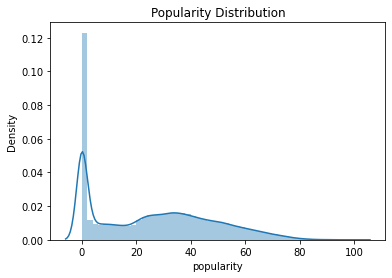

In [ ]:
#popularity distribution across the dataset
sns.distplot(df['popularity']).set_title('Popularity Distribution')

## Numerical features

### Popularity distribution for the numerical features of the dataset:

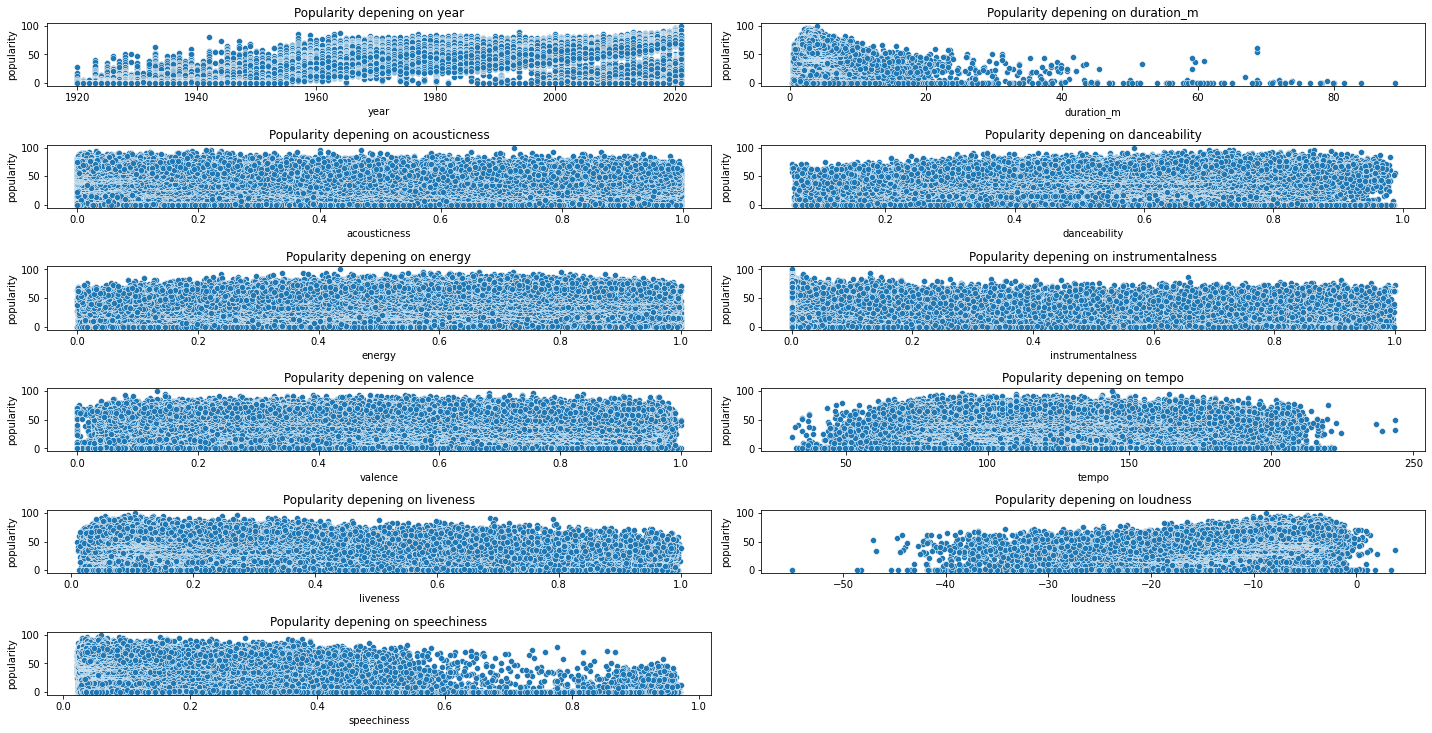

In [6]:
#popularity distribution for each feature
plt.figure(figsize=(20,20))
count=1
columns = ['year', 'duration_m','acousticness', 'danceability','energy',
           'instrumentalness','valence','tempo','liveness','loudness','speechiness']

for xvar in columns:
    plt.subplot(12,2,count)
    count +=1
    plt.gca().set_title('Popularity depening on ' + xvar)
    sns.scatterplot(x=df[xvar], y=df.popularity)

plt.tight_layout()

### Mean popularity for each numerical feature

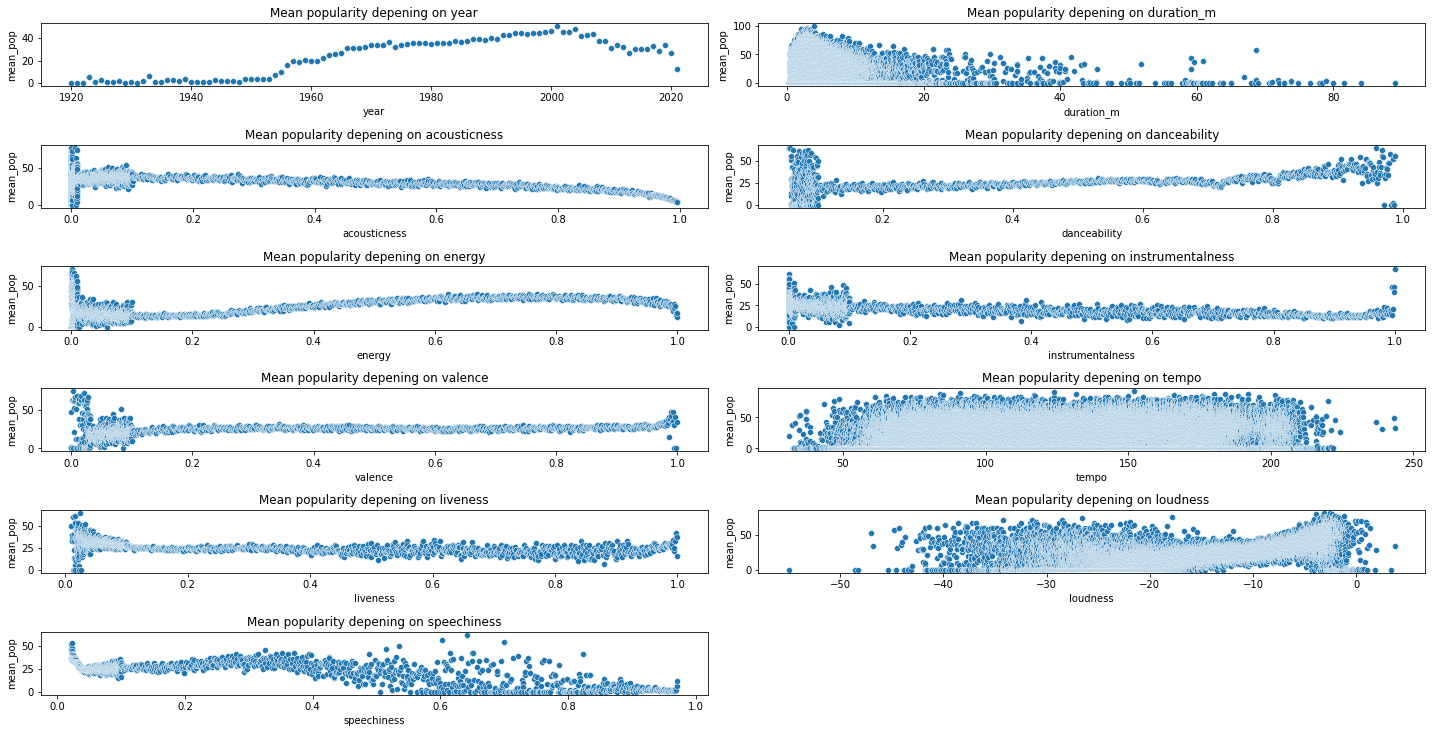

In [7]:
#mean popularity distribution for each feature
plt.figure(figsize=(20,20))
count=1

for xvar in columns:
    plt.subplot(12,2,count)
    count +=1
    plt.gca().set_title('Mean popularity depening on ' + xvar)
    mean_df = df.groupby([xvar])['popularity'].mean().to_frame().reset_index()
    mean_df['mean_pop'] = mean_df['popularity']
    sns.scatterplot(x=mean_df[xvar], y=mean_df.mean_pop)

plt.tight_layout()

## Categorical features

- Explicit

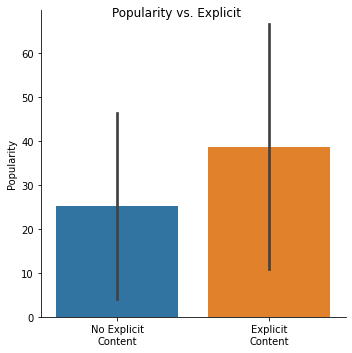

In [ ]:
exp_data = sns.catplot(data=df, kind="bar",x="explicit", y="popularity",ci="sd")
exp_data.fig.suptitle('Popularity vs. Explicit')
exp_data.set_axis_labels("", "Popularity")
exp_data.set_xticklabels(['No Explicit\nContent', 'Explicit\nContent'])
plt.show()

- Key

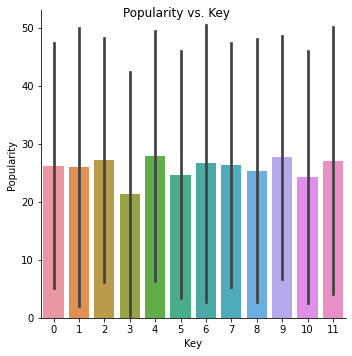

In [ ]:
key_data = sns.catplot(data=df, kind="bar",x="key", y="popularity", ci='sd')
key_data.fig.suptitle('Popularity vs. Key')
key_data.set_axis_labels("Key", "Popularity")
plt.show()

- Mode

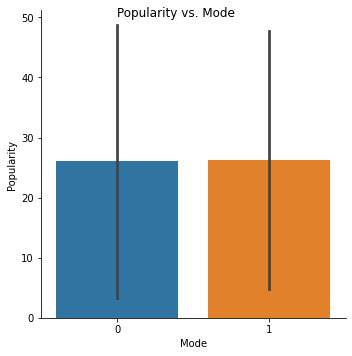

In [ ]:
mode_data = sns.catplot(data=df, kind="bar",x="mode", y="popularity", ci='sd')
mode_data.fig.suptitle('Popularity vs. Mode')
mode_data.set_axis_labels("Mode", "Popularity")
plt.show()

## Correlation analysis

In [ ]:
df.corr()

,year,duration_m,key,mode,explicit,popularity,acousticness,danceability,energy,instrumentalness,valence,tempo,liveness,loudness,speechiness
year,1.000000,0.106595,0.019652,-0.045296,0.154376,0.550036,-0.607117,0.149635,0.542063,-0.126737,-0.049965,0.160466,-0.008572,0.466531,-0.221345
duration_m,0.106595,1.000000,0.001363,-0.046020,-0.034667,0.027861,-0.087144,-0.106823,0.058421,0.103258,-0.185864,-0.011629,0.031105,0.017855,-0.099168
key,0.019652,0.001363,1.000000,-0.126688,0.006259,0.002332,-0.027634,0.026129,0.035243,-0.005283,0.025267,0.005749,-0.003404,0.024128,0.010048
mode,-0.045296,-0.046020,-0.126688,1.000000,-0.063252,0.003243,0.061893,-0.046145,-0.053057,-0.054772,0.022015,0.003218,0.001493,-0.016703,-0.041431
explicit,0.154376,-0.034667,0.006259,-0.063252,1.000000,0.155086,-0.210774,0.203078,0.103484,-0.129025,-0.010876,0.006596,0.037624,0.107044,0.354828
popularity,0.550036,0.027861,0.002332,0.003243,0.155086,1.000000,-0.412588,0.131652,0.344345,-0.295938,0.059452,0.098461,-0.083925,0.350738,-0.200995
acousticness,-0.607117,-0.087144,-0.027634,0.061893,-0.210774,-0.412588,1.000000,-0.259462,-0.749274,0.227522,-0.166734,-0.221194,-0.031308,-0.543830,-0.022444
danceability,0.149635,-0.106823,0.026129,-0.046145,0.203078,0.131652,-0.259462,1.000000,0.200014,-0.220493,0.540082,-0.005882,-0.108911,0.243732,0.241069
energy,0.542063,0.058421,0.035243,-0.053057,0.103484,0.344345,-0.749274,0.200014,1.000000,-0.179798,0.326069,0.263407,0.137218,0.778027,-0.114710
instrumentalness,-0.126737,0.103258,-0.005283,-0.054772,-0.129025,-0.295938,0.227522,-0.220493,-0.179798,1.000000,-0.211842,-0.067251,-0.045866,-0.318542,-0.133086


### Correlation Heatmap

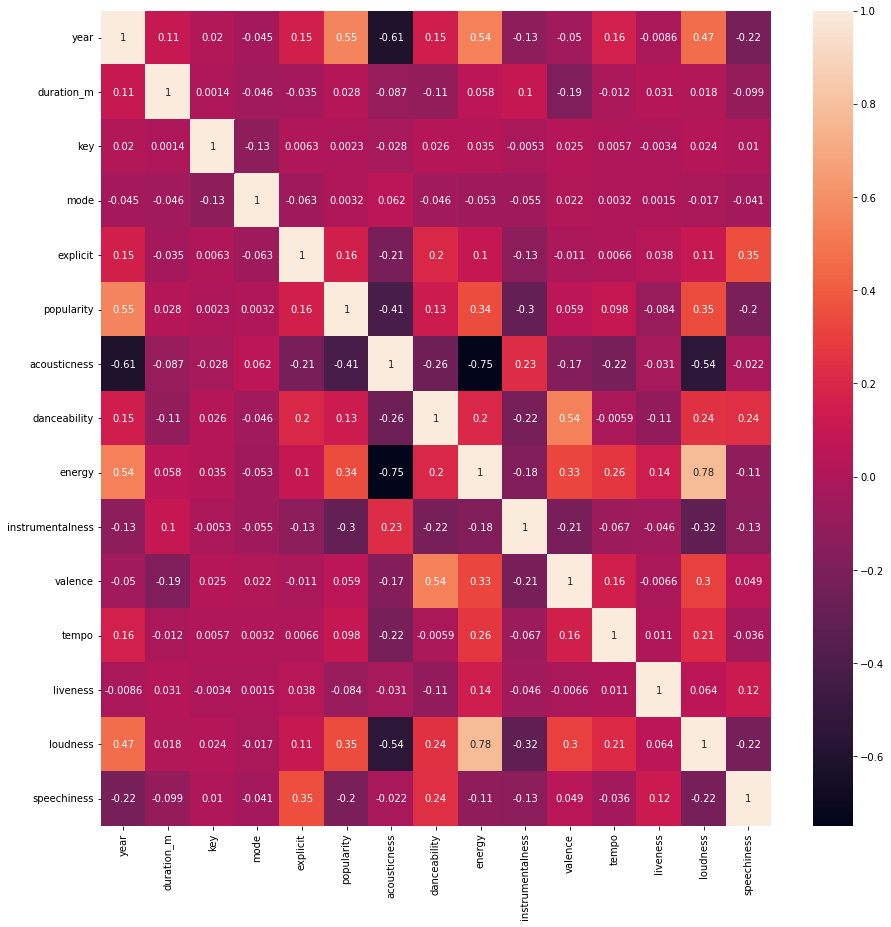

In [ ]:
#correlation
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), annot=True)

### Correlation to Popularity

In [ ]:
numeric_columns = df.columns[df.dtypes != 'object']
numeric_df = pd.DataFrame(data=df, columns=numeric_columns, index=df.index)
corr = df.corr()
pop_corr = corr['popularity'].sort_values(ascending=False)
pop_corr

popularity          1.000000
year                0.550036
loudness            0.350738
energy              0.344345
explicit            0.155086
danceability        0.131652
tempo               0.098461
valence             0.059452
duration_m          0.027861
mode                0.003243
key                 0.002332
liveness           -0.083925
speechiness        -0.200995
instrumentalness   -0.295938
acousticness       -0.412588
Name: popularity, dtype: float64

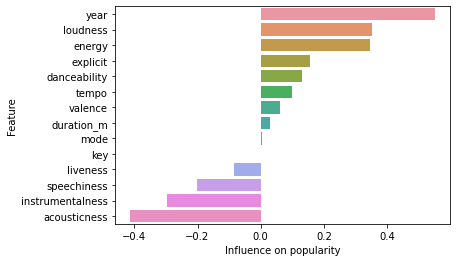

In [ ]:
ax = sns.barplot(x=pop_corr.values[1:], y=pop_corr.index[1:])
ax.set_xlabel('Influence on popularity')
ax.set_ylabel('Feature')
plt.show()

# Modelling
We'll use the following algorithms for our analysis:
- Decision Tree
- Random Forest
- KNN

In [8]:
#Categorical features: one-hot encoding
categorical_cols = ['explicit','key','mode']
df = pd.get_dummies(df,columns=categorical_cols, sparse=True)

In [9]:
#classification problem
df.loc[df['popularity'] < 20, 'popularity'] = 0
df.loc[(df['popularity'] >= 20) & (df['popularity'] < 40), 'popularity'] = 1
df.loc[(df['popularity'] >= 40) & (df['popularity'] < 60), 'popularity'] = 2
df.loc[(df['popularity'] >= 60) & (df['popularity'] < 80), 'popularity'] = 3
df.loc[df['popularity'] >= 80, 'popularity'] = 4

In [10]:
#Spliting data
X = df.drop('popularity', axis=1)
y = df['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#Scaling data
columns = X.columns.tolist()
X_train[columns] = MinMaxScaler().fit_transform(X_train[columns])
X_test[columns] = MinMaxScaler().fit_transform(X_test[columns])


d:\Documents\Télécom Paris\2021\P1\SD201\actual_project\sd201_project\lib\site-packages\sklearn\utils\validation.py:616: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
d:\Documents\Télécom Paris\2021\P1\SD201\actual_project\sd201_project\lib\site-packages\sklearn\utils\validation.py:616: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
d:\Documents\Télécom Paris\2021\P1\SD201\actual_project\sd201_project\lib\site-packages\sklearn\utils\validation.py:616: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
d:\Documents\Télécom Paris\2021\P1\SD201\actual_project\sd201_project\lib\site-packages\sklearn\utils\validation.py:616: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


### Decision Tree

In [21]:
#From https://github.com/DTrimarchi10/confusion_matrix
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

Since we do not know the optimal depth of the tree, we will use a k-fold cross validation algorithm.

In [ ]:
def cv_tree(X, y, tree_depths, cv=5, scoring='accuracy'):

    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []

    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)

        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))

    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)

    return cv_scores_mean, cv_scores_std, accuracy_scores

In [ ]:
def plot_cv_tree(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

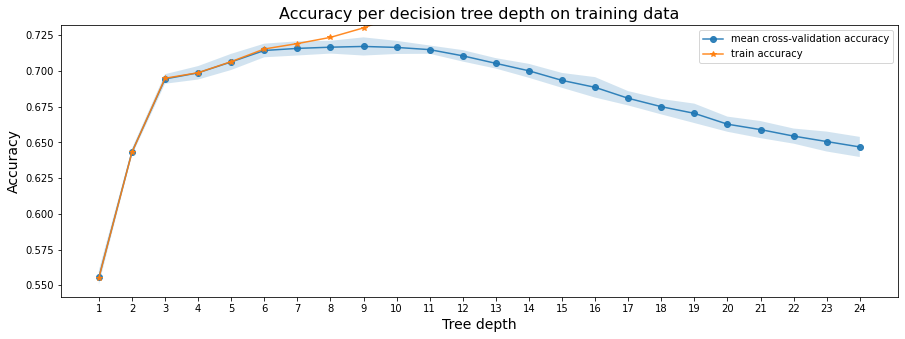

In [ ]:
# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = cv_tree(X_train, y_train, sm_tree_depths)
# plotting accuracy
plot_cv_tree(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

In [ ]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print(f'The depth-{sm_best_tree_depth} tree achieves the best mean cross-validation accuracy {round(sm_best_tree_cv_score*100,5)} +/- {round(sm_best_tree_cv_score_std*100, 5)}% on the training dataset.')

The depth-9 tree achieves the best mean cross-validation accuracy 71.71286 +/- 0.31809% on training dataset.


In [ ]:
decision = DecisionTreeClassifier(criterion = "entropy", max_depth = sm_best_tree_depth)
decision = decision.fit(X_train,y_train)

predictions = decision.predict(X_test)

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87     20989
           1       0.64      0.75      0.69     15113
           2       0.60      0.46      0.52     11117
           3       0.59      0.28      0.38      3790
           4       0.00      0.00      0.00       182

    accuracy                           0.72     51191
   macro avg       0.53      0.48      0.49     51191
weighted avg       0.70      0.72      0.70     51191



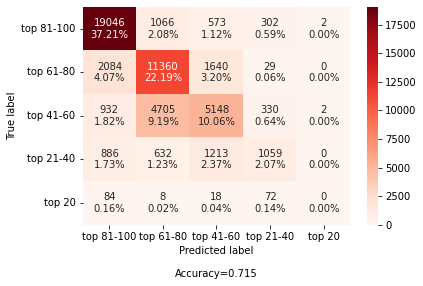

In [ ]:
categories = ['top 81-100','top 61-80','top 41-60','top 21-40','top 20']
cf_matrix = confusion_matrix(y_test,predictions)
make_confusion_matrix(cf_matrix, categories = categories, cmap='Reds')

In [ ]:
print(f'The accuracy using decision tree method is {accuracy_score(y_test, predictions)*100}%.')

The accuracy using decision tree method is 71.52233791096091%.


Since we have much more "top 81-100", "top 61-80", and "top 41-60" than "top 20" samples, we can see that this method is severely affected by the amount of data in each class because none of the attempts predicted a "top 20". However, the accuracy reached the 71.52% mark.

### Random Forest

Since we also do not know the best parameters for the random forest, we will try a "random grid search" method:

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 300, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 25, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 122, 144, 166, 188, 211, 233, 255, 277, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 7, 9, 11, 13, 15, 17,
                                                      19, 21, 23, 25, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 122, 144, 166,
                                                         188, 211, 233, 255,
                                                         277, 300]},
                   random_state=42, verbose=2)

Therefore, we have the best parameters as follows:

In [ ]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 21,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 144}

So, we will use the best estimator:

In [ ]:
best_rf = rf_random.best_estimator_

Finally, we can evaluate our model:

In [ ]:
predictions = best_rf.predict(X_test)

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88     20989
           1       0.64      0.76      0.69     15113
           2       0.60      0.48      0.53     11117
           3       0.63      0.33      0.43      3790
           4       1.00      0.01      0.01       182

    accuracy                           0.73     51191
   macro avg       0.74      0.50      0.51     51191
weighted avg       0.72      0.73      0.71     51191



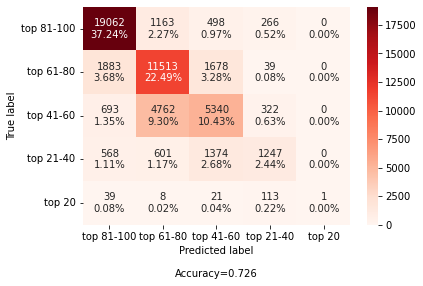

In [ ]:
categories = ['top 81-100','top 61-80','top 41-60','top 21-40','top 20']
cf_matrix = confusion_matrix(y_test,predictions)
make_confusion_matrix(cf_matrix, categories = categories, cmap='Reds')

In [ ]:
print(f'The accuracy using random forest method is {accuracy_score(y_test, predictions)*100}%.')

The accuracy using random forest method is 72.59674552167374%.


### K-Nearest Neighbours


In [11]:
def cv_knn(X, y, neighbors, cv=5, scoring='accuracy'):

    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []

    for k in neighbors:
        knn = KNeighborsClassifier(n_neighbors=k)
        cv_scores = cross_val_score(knn, X, y, cv=cv, scoring=scoring)

        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(knn.fit(X, y).score(X, y))

    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)

    return cv_scores_mean, cv_scores_std, accuracy_scores

In [14]:
def plot_cv_knn(neighbors, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(neighbors, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(neighbors, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    # ax.plot(neighbors, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('neighbours', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(neighbors)
    ax.legend()

In [13]:
# fitting k-neighbors of k = 1 to 7
sm_neighbors = range(1,8)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = cv_knn(X_train, y_train, sm_neighbors)

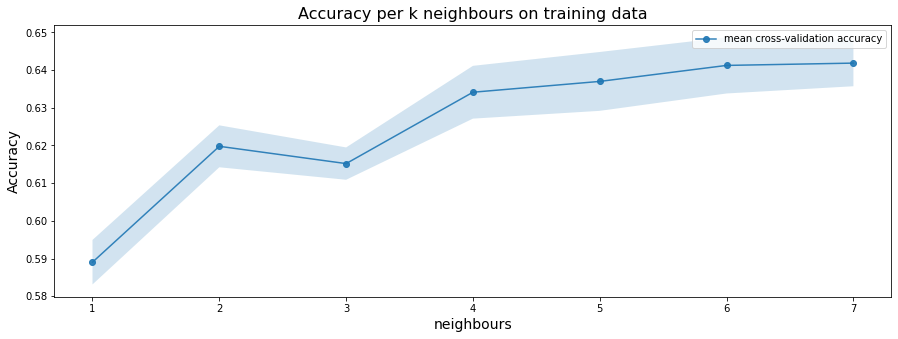

In [15]:
# plotting accuracy
plot_cv_knn(sm_neighbors, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per k neighbours on training data')

In [16]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_k = sm_neighbors[idx_max]
sm_best_k_cv_score = sm_cv_scores_mean[idx_max]
sm_best_k_cv_score_std = sm_cv_scores_std[idx_max]
print(f'{sm_best_k} neighbors in knn achieves the best mean cross-validation accuracy {round(sm_best_k_cv_score*100,5)} +/- {round(sm_best_k_cv_score_std*100, 5)}% on training dataset.')

7 neighbors in knn achieves the best mean cross-validation accuracy 64.18543 +/- 0.3069% on training dataset.


In [18]:
knn = KNeighborsClassifier(n_neighbors=sm_best_k)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

Model evaluation:

In [19]:
predictions = knn.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82     20989
           1       0.57      0.64      0.60     15113
           2       0.46      0.41      0.43     11117
           3       0.43      0.27      0.33      3790
           4       0.00      0.00      0.00       182

    accuracy                           0.64     51191
   macro avg       0.45      0.43      0.44     51191
weighted avg       0.63      0.64      0.63     51191



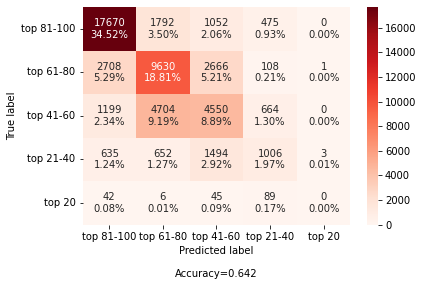

In [22]:
categories = ['top 81-100','top 61-80','top 41-60','top 21-40','top 20']
cf_matrix = confusion_matrix(y_test,predictions)
make_confusion_matrix(cf_matrix, categories = categories, cmap='Reds')

In [23]:
print(f'The accuracy using knn method (k = {sm_best_k}) is {accuracy_score(y_test, predictions)*100}%.')

The accuracy using knn method (k = 7) is 64.1831571956008%.
